In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = np.genfromtxt('data_banknote_authentication.txt', delimiter = ',')
X=data[:,:4]
y=data[:,4]

## We can visualize the data using scatter plot

Text(0, 0.5, 'skewness of wavelet')

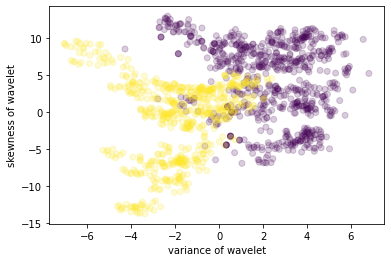

In [4]:
plt.scatter(X[:,0],X[:,1],alpha=0.2,c=y,cmap='viridis')
plt.xlabel('variance of wavelet')
plt.ylabel('skewness of wavelet')

#### Now, let us divide the data into a training set and test set. This can be accomplished using sklearn train_test_split() function. 20% of data is selected for test and 80% for train.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train=X_train.T
y_train=y_train.reshape(1,y_train.shape[0])
X_test=X_test.T
y_test=y_test.reshape(1,y_test.shape[0])
print('Train X shape : ',X_train.shape)
print('Train Y shape : ',y_train.shape)
print ('I have m = %d training examples!' % (X_train.shape[1]))
print('\n Test X Shape: ',X_test.shape)

Train X shape :  (4, 1097)
Train Y shape :  (1, 1097)
I have m = 1097 training examples!

 Test X Shape:  (4, 275)


### Neural Network Model

In [6]:
def define_structure(X, Y):
    input_unit = X.shape[0] # size of input layer
    hidden_unit = 4 #hidden layer of size 4
    output_unit = Y.shape[0] # size of output layer
    return (input_unit, hidden_unit, output_unit)
(input_unit, hidden_unit, output_unit) = define_structure(X_train, y_train)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))

The size of the input layer is:  = 4
The size of the hidden layer is:  = 4
The size of the output layer is:  = 1


#### Intialize Model parameter : We need to initialize the weight matrices and bias vectors. Weight is initialized randomly while bias is set to zeros.

In [7]:
def parameters_initialization(input_unit, hidden_unit, output_unit):
    np.random.seed(2) 
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

#### FORWARD PROPOGATION : ON GIVEN SET OF INPUT FEATURES COMPUTE ACTIVATION FUNCTION FOR EACH LAYER AND USING TANH for Hidden layer


In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def forward_propogation(X,parameters):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    return A2,cache


### Computing Cost : In the above we calculated A2 , Using A2 We can compute cost